In [1]:
# Importamos los paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Funciones propias:
def plt_csp(Y_test, y_predict):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(Y_test, y_predict, edgecolors=(0, 0, 0))
    ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

In [3]:
# Cargamos dataframes disponibles: 
df_adic  = pd.read_csv('informacion_adicional_zonas.csv', delimiter = ',')
df = pd.read_csv('mercado_inmobiliario.csv', delimiter = ',')
pd.set_option('max_rows', None)

In [4]:
# Dataframe de delitos descargado de 
delitos = pd.read_excel('dat.xlsx',  header=2)
# Pondero tipos de delito para crear una nueva variable que añadir al df:
delitos['RELACIONADAS CON LAS PERSONAS'] = delitos['RELACIONADAS CON LAS PERSONAS'].apply(lambda x: x*0.4)
delitos['RELACIONADAS CON EL PATRIMONIO'] = delitos['RELACIONADAS CON EL PATRIMONIO'].apply(lambda x: x*0.1)
delitos['POR TENENCIA DE ARMAS'] = delitos['POR TENENCIA DE ARMAS'].apply(lambda x: x*0.28)
delitos['POR TENENCIA DE DROGAS'] = delitos['POR TENENCIA DE DROGAS'].apply(lambda x: x*0.17)
delitos['POR CONSUMO DE DROGAS'] = delitos['POR CONSUMO DE DROGAS'] .apply(lambda x: x*0.05)

delitos['Delitos_Ponderado'] = (delitos['RELACIONADAS CON LAS PERSONAS'] + delitos['RELACIONADAS CON EL PATRIMONIO'] + delitos['POR TENENCIA DE ARMAS'] + delitos['POR TENENCIA DE DROGAS'] + delitos['POR CONSUMO DE DROGAS'])/ 5

In [5]:
delitos.head()

,DISTRITOS,RELACIONADAS CON LAS PERSONAS,RELACIONADAS CON EL PATRIMONIO,POR TENENCIA DE ARMAS,POR TENENCIA DE DROGAS,POR CONSUMO DE DROGAS,Delitos_Ponderado
0,CENTRO,19.2,10.3,0.84,28.90,2.10,12.268
1,ARGANZUELA,3.6,1.4,0.00,1.19,0.05,1.248
2,RETIRO,3.2,0.7,0.00,1.53,0.05,1.096
3,SALAMANCA,4.4,3.4,0.56,2.04,0.10,2.100
4,CHAMARTÍN,4.8,0.8,1.12,5.78,0.55,2.610


In [6]:
# Enriquecemos df principal con la informacion de "zonas":
df_unified = df.merge(df_adic, on='Zone', how = 'left')

In [7]:
# Corrección variables para hacer el merge con el dataframe 'delitos':
df_unified['Area'] = df_unified['Area'].str.replace('ciudad linael','ciudad lineal')
df_unified['Area'] = df_unified['Area'].str.replace('moncloa','Moncloa')
df_unified['Area'] = df_unified['Area'].str.replace('Salamancca','Salamanca')
df_unified['Area'] = df_unified['Area'].str.replace('chamberí','Chamberí')
df_unified['Area'] = df_unified['Area'].str.replace('fuencarral','Fuencarral')

In [8]:
# Acondiciono a mismo nombre que las Areas del DF principal:
delitos['DISTRITOS'].unique()
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('CENTRO','Centro')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('ARGANZUELA','Arganzuela')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('RETIRO','Retiro')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('SALAMANCA','Salamanca')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('TETUÁN','Tetuán')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('CHAMBERÍ','Chamberí')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('FUENCARRAL - EL PARDO','Fuencarral')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('MONCLOA - ARAVACA','Moncloa')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('LATINA','Latina')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('CARABANCHEL','Carabanchel')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('USERA','Usera')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('MORATALAZ','Moratalaz')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('CIUDAD LINEAL','ciudad lineal')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('HORTALEZA','Hortaleza')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('VILLA DE VALLECAS','Villa de Vallecas')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('VICÁLVARO','Vicálvaro')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('SAN BLAS - CANILLEJAS','San Blás')
delitos['DISTRITOS'] = delitos['DISTRITOS'].str.replace('BARAJAS','Barajas')

In [9]:
# Acoto DF delitos para incorporar solo la variable calculada:
delitos = delitos[['DISTRITOS','Delitos_Ponderado']]

In [10]:
# Localizo los Ids que no tenemos en df-unified y elimino:
delitos[(delitos['DISTRITOS']=='CHAMARTÍN' )| (delitos['DISTRITOS']=='VILLAVERDE' ) | (delitos['DISTRITOS']=='PUENTE DE VALLECAS' )]
delitos = delitos.drop(delitos.index[[4,12,16,21,22]]).reset_index(drop=True)
delitos.rename(columns = {'DISTRITOS':'Area'},inplace = True)

In [11]:
delitos.head()

,Area,Delitos_Ponderado
0,Centro,12.268
1,Arganzuela,1.248
2,Retiro,1.096
3,Salamanca,2.100
4,Tetuán,4.626


In [12]:
# Unifico con DF original y añado en valores nulos la media de la variable:
df_unified = df_unified.merge(delitos, on='Area', how = 'left')
mean_value = df_unified['Delitos_Ponderado'].mean()
df_unified['Delitos_Ponderado'].fillna(value=mean_value, inplace=True)
df_unified['Delitos_Ponderado'].isna().sum()

0

Exploratory Data Analisys (EDA)

In [13]:
# Una primera visualización de los datos:
df_unified.head(10)

,Id,Area,Address,Number,Zone,Bedrooms,Sq. Mt.,Floor,Outer,Elevator,...,Cottage,Duplex,Semi-detached,Rent,Rent_mean,Zip Code,Num schools,Num parks,Num banks,Delitos_Ponderado
0,1,ciudad lineal,Piso en Quintana,NaN,Quintana,2.0,72,3.0,1.0,1,...,0,0,0,"1,300",NaN,NaN,NaN,NaN,NaN,4.412
1,2,ciudad lineal,Piso en calle de Arturo Soria,NaN,Costillares,5.0,260,2.0,1.0,1,...,0,0,0,"3,000",NaN,NaN,NaN,NaN,NaN,4.412
2,3,ciudad lineal,Piso en calle de Vicente Muzas,4,Colina,2.0,100,3.0,1.0,1,...,0,0,0,"1,300",NaN,NaN,NaN,NaN,NaN,4.412
3,4,ciudad lineal,Piso en calle Badajoz,NaN,San Pascual,3.0,120,4.0,1.0,1,...,0,0,0,"1,600",NaN,NaN,NaN,NaN,NaN,4.412
4,5,ciudad lineal,Piso en calle de Nuestra Señora del Villar,9,Ventas,2.0,60,3.0,1.0,0,...,0,0,0,800,NaN,NaN,NaN,NaN,NaN,4.412
5,6,ciudad lineal,Ático en calle José Silva,NaN,San Juan Bautista,3.0,101,5.0,1.0,1,...,0,0,0,"1,850",NaN,NaN,NaN,NaN,NaN,4.412
6,7,ciudad lineal,Piso en Virgen de Lourdes,NaN,Concepción,1.0,60,3.0,1.0,1,...,0,0,0,850,NaN,NaN,NaN,NaN,NaN,4.412
7,8,ciudad lineal,Piso en calle de Arturo Soria,NaN,Costillares,4.0,160,2.0,1.0,1,...,0,0,0,"1,700",NaN,NaN,NaN,NaN,NaN,4.412
8,9,ciudad lineal,Piso en calle Jazmín,17,Costillares,1.0,52,1.0,1.0,1,...,0,0,0,850,NaN,NaN,NaN,NaN,NaN,4.412
9,10,ciudad lineal,Piso en general aranaz,NaN,Concepción,3.0,190,1.0,1.0,1,...,0,0,0,"1,900",NaN,NaN,NaN,NaN,NaN,4.412


In [14]:
 # De esta informacion extraemos que hay valores nulos y tendran que ser tratados. Asi como la existencia de distintos Dtypes que deberan ser tratados para la incorporacion al modelo.
df_unified.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677 entries, 0 to 2676
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 2677 non-null   int64  
 1   Area               2677 non-null   object 
 2   Address            2669 non-null   object 
 3   Number             942 non-null    object 
 4   Zone               2673 non-null   object 
 5   Bedrooms           2551 non-null   float64
 6   Sq. Mt.            2677 non-null   object 
 7   Floor              2498 non-null   float64
 8   Outer              2471 non-null   float64
 9   Elevator           2512 non-null   object 
 10  Penthouse          2677 non-null   int64  
 11  Cottage            2677 non-null   int64  
 12  Duplex             2677 non-null   int64  
 13  Semi-detached      2677 non-null   int64  
 14  Rent               2662 non-null   object 
 15  Rent_mean          1699 non-null   float64
 16  Zip Code           1699 

In [15]:
# Set de estadisticos basicos (Media, mediana, cuartiles...)
# Observamos, por ejemplo, como las distribuciones entre variables son dispares y necesitara normalizarse para no ponderar de manera
# no deseada.
df_unified.describe()

,Id,Bedrooms,Floor,Outer,Penthouse,Cottage,Duplex,Semi-detached,Rent_mean,Zip Code,Num schools,Num parks,Num banks,Delitos_Ponderado
count,2677.000000,2551.000000,2498.000000,2471.000000,2677.000000,2677.000000,2677.000000,2677.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,2677.000000
mean,1114.976466,2.462956,20.842274,0.859976,0.078072,0.041464,0.028016,0.013448,2363.231313,28035.347852,15.566215,7.600353,20.810477,4.544795
std,611.481246,1.319871,861.058099,0.347082,0.268336,0.199399,0.165051,0.115204,746.455690,113.526581,4.961174,2.591056,7.734972,3.765584
min,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1118.000000,28001.000000,7.000000,3.000000,7.000000,1.022000
25%,574.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1766.000000,28006.000000,12.000000,6.000000,12.000000,2.100000
50%,1142.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2161.000000,28011.000000,16.000000,8.000000,20.000000,2.828000
75%,1622.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3159.000000,28036.000000,19.000000,10.000000,26.000000,4.626000
max,2188.000000,8.000000,43039.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3918.000000,28810.000000,24.000000,11.000000,34.000000,12.268000


Analisis por Variables (Por cuestiones de tiempo solo voy a analizar las mas relevantes)

In [16]:
print("Hay un total de ",len(df_unified['Zone'].unique()), "zonas distintas")
df_unified['Zone'].unique()

Hay un total de  141 zonas distintas


array(['Quintana', 'Costillares', 'Colina', 'San Pascual', 'Ventas',
       'San Juan Bautista', 'Concepción', 'Pueblo Nuevo', 'Atalaya',
       'Mirasierra', 'La Paz', 'Las Tablas', 'Tres Olivos - Valverde',
       'Montecarmelo', 'Peñagrande', 'Pilar', 'Arroyo del Fresno', 'Peña',
       'Fuentelarreina', 'Tres Olivos-Valverde', 'Pinar del Rey',
       'Sanchinarro', 'Canillas', 'Apóstol Santiago',
       'Conde Orgaz-Piovera', 'Valdebebas - Valdefuentes', 'Palomas',
       'Manoteras', 'Virgen del Cortijo - Manoteras', 'Aluche',
       'Puerta del Á\x81ngel', 'Campamento', 'Á\x81guilas', 'Lucero',
       'Los Cármenes', 'Aravaca', 'Ciudad Universitaria', 'Argüelles',
       'Valdemarín', 'Valdezarza', 'El Plantío', 'Vinateros',
       'Media Legua', 'Marroquina', 'Horcajo', 'Pavones', 'Fontarrón',
       'Palomeras Bajas', 'Palomeras sureste', 'San Diego', 'Numancia',
       'Entrevías', 'Portazgo', 'Estrella', 'Pacífico', 'Niño JesÁºs',
       'Jerónimos', 'Ibiza', 'Adelfas', 'Goya

Chueca-Justicia            174
Castellana                 154
Argüelles                  126
Cuatro Caminos             106
Recoletos                   98
Bernabéu-Hispanoamérica     98
Malasaña-Universidad        96
Lavapiés-Embajadores        90
Goya                        75
Rejas                       68
Aravaca                     66
Almagro                     56
Nueva España                48
Palacio                     45
Ibiza                       42
Name: Zone, dtype: int64


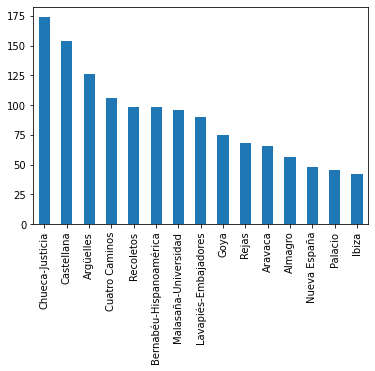

In [17]:
# Un ranking de número de propiedades disponibles por zona:
print(df_unified['Zone'].value_counts().head(15))
df_unified['Zone'].value_counts().head(15).plot.bar()

In [18]:
# Numero medio de habitaciones por zona ordenado de forma descendente:
df_unified.groupby(['Zone']).mean()[['Bedrooms']].sort_values(by= 'Bedrooms', ascending = False)

,Bedrooms
Zone,
chalet independiente en Nueva España,7.000000
El Plantío,5.166667
en Nueva España,4.750000
Conde Orgaz-Piovera,4.500000
Ciudad Universitaria,4.454545
Aravaca,4.242424
Mirasierra,4.100000
en Nuevos Ministerios-Ríos Rosas,4.000000
Horcajo,4.000000


In [19]:
# Modificacion de nombre y formato para la variable metros cuadrados
df_unified.rename(columns = {'Sq. Mt.':'MetrosCuad'},inplace = True)
df_unified['MetrosCuad'] = df_unified['MetrosCuad'].str.replace(',','.')
df_unified= df_unified.astype({'MetrosCuad':float})

In [20]:
# Media de metros cuadrados por zona ordenado de forma descendente:
df_unified.groupby(['Zone']).mean()[['MetrosCuad']].sort_values(by= 'MetrosCuad', ascending = False)

,MetrosCuad
Zone,
El Plantío,467.050000
Conde Orgaz-Piovera,335.942857
Ciudad Universitaria,330.488261
Aravaca,306.939394
chalet independiente en Nueva España,300.000000
Fuentelarreina,285.200000
Valdemarín,252.857778
Canillejas,244.500000
Mirasierra,237.900000


In [21]:
# Modificacion de nombre y formato para la Renta
df_unified['Rent'] = df_unified['Rent'].str.replace(',','')
df_unified= df_unified.astype({'Rent':float})

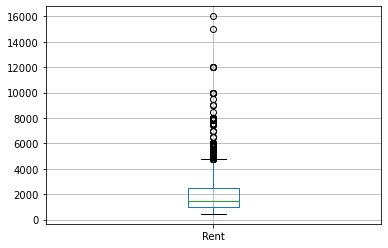

In [22]:
# Observamos la distribucion de la media y la existencia de outliers (a ser tratado posteriormente)
df_unified[['Rent']].dropna().boxplot()

In [23]:
# Renta media por zona ordenado de forma descendente:
df_unified.groupby(['Zone']).mean()[['Rent']].sort_values(by= 'Rent', ascending = False)

,Rent
Zone,
El Plantío,6563.333333
Ciudad Universitaria,4622.130435
en El Viso,4240.714286
chalet independiente en Nueva España,4200.000000
Jerónimos,3977.692308
Conde Orgaz-Piovera,3768.285714
en Almagro,3700.000000
en Nueva España,3550.000000
Recoletos,3539.673469


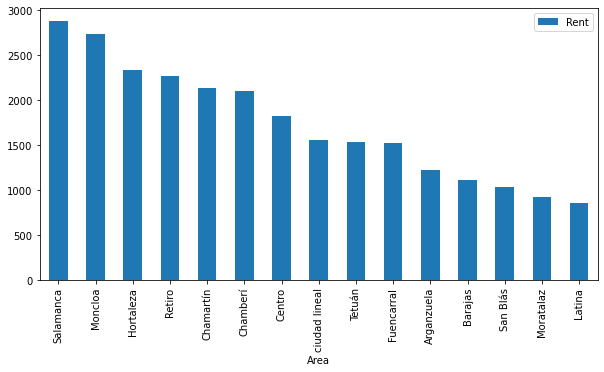

In [24]:
# Renta media por Areas representado:
df_unified.groupby(['Area']).mean().sort_values(by= 'Rent', ascending = False).head(15)[['Rent']].plot.bar(figsize= (10,5))

In [25]:
# Adecuacion de formato de ascensor:
df_unified['Elevator']=np.where(df_unified.Elevator=='1', 1,
                                np.where(df_unified.Elevator=='interior', 1,0))
df_unified= df_unified.astype({'Elevator':int})

df_unified['Elevator'].value_counts()

1    2220
0     457
Name: Elevator, dtype: int64

In [26]:
# Numero de Propiedades con acensor por area:
print(df_unified.groupby(['Area']).count()[['Elevator']].sort_values(by= 'Elevator', ascending = False))
print("Hay un total de", df_unified[df_unified['Elevator']==1]['Id'].count(), "viviendas con ascensor.Un porcentaje del total de ",((2220 / 2677)*100),"%")

                   Elevator
Area                       
Centro                  473
Salamanca               401
Chamartín               271
Moncloa                 264
Tetuán                  212
Chamberí                205
Hortaleza               127
Fuencarral              119
ciudad lineal           102
San Blás                 98
Retiro                   86
Arganzuela               56
Carabanchel              56
Puente Vallecas          45
Latina                   40
Villa de Vallecas        30
Vicálvaro                29
Usera                    24
Barajas                  23
Moratalaz                16
Hay un total de 2220 viviendas con ascensor.Un porcentaje del total de  82.9286514755323 %


Y hasta aqui el primer vistazo a los datos. Con las siguientes conclusiones: 
- En Madrid hay un total de 2677 viviendas en alquiler. Siendo la zona de Chueca- Justicia la que mas dispone con 177 
- La media de habitaciones en las viviendas es de 2 siendo la zona con el mayor numero media Nueva España y la menor Plaza España
- La media de metros cuadrados es de 127 (aunque tiene una desviacion tipica muy grande, por lo que hay mucha diferencia).
- La renta mas alta la encontramos en la zona de "El Plantío" y en el area de "Salamanca".
- La mayoria de bloques tienen ascensor (un 83%)

 Data Transformation 


In [27]:
# La variable number (y zip Code) tiene muchos valores nulos, y al ser una caracteristica no podemos inferir un valor adecuado por lo que la primera accion va  aser eliminarla.
df_unified= df_unified.drop(columns = ['Number', 'Zip Code','Id'])
df_unified.shape

(2677, 18)

Valores Nulos

In [28]:
# Primer vistazo a la cantidad de nulos por variable:
# La estrategia para cada una de ellas será: 
# Para las categoricas (Address y Zone)( y por razones de tiempo, ya que la Zone de las 4 
# que no aparce se podria haber inferido) vamos a sacarlas del dataset.
# Para las 126 de bedrooms vamos a rellenarlos con los valores medios de su zona.
# Para floor vamos a rellenar con la media
# Para Outer vamos a rellenar en proporcion a la distribucion
# Para REnt vamos a rellenar con la media de su zona 
# para Rent_mean con su valor de zona y los que no se han podido asignar les daré el valor de la media
# Num schools, num parks y num banks se van a rellenar con la media.

df_unified.isna().sum()

Area                   0
Address                8
Zone                   4
Bedrooms             126
MetrosCuad             0
Floor                179
Outer                206
Elevator               0
Penthouse              0
Cottage                0
Duplex                 0
Semi-detached          0
Rent                  15
Rent_mean            978
Num schools          978
Num parks            978
Num banks            978
Delitos_Ponderado      0
dtype: int64

In [29]:
# Para las categoricas (Address y Zone) vamos a sacarlas del dataset.
df_unified = df_unified[df_unified['Address'].isna()== False]
df_unified = df_unified[df_unified['Zone'].isna()== False]
df_unified.shape

(2665, 18)

In [30]:
# Para las 126 de bedrooms vamos a rellenarlos con los valores medios de su zona:

bedrooms = df_unified[df_unified['Bedrooms'].isna()==True]
# Vemos de que zona son las que no tienen valores
Zone_bedrooms =bedrooms['Zone'].unique()
# Hacemos un groupby de las medias por zonas
beds_mean_zone = df_unified.groupby(['Zone'])[['Bedrooms' ]].agg('mean')
# Unimos la informacion de las medias al dataframe de los nulos y sustituimos por la media 
beds_no_null= bedrooms.merge(beds_mean_zone, on= 'Zone', how = 'left')
beds_no_null = beds_no_null.drop(columns= ['Bedrooms_x'])
beds_no_null = beds_no_null.rename(columns={'Bedrooms_y' : 'Bedrooms'})
column_names = ['Area', 'Address', 'Zone', 'Bedrooms', 'MetrosCuad', 'Floor',
       'Outer', 'Elevator', 'Penthouse', 'Cottage', 'Duplex', 'Semi-detached',
       'Rent', 'Rent_mean', 'Num schools', 'Num parks', 'Num banks','Delitos_Ponderado']

beds_no_null = beds_no_null.reindex(columns=column_names)

# Quitamos los valores nulos
df_unified = df_unified[df_unified['Bedrooms'].isna()==False]
# Añadimos las nuevas filas: 
df_unified = df_unified.append(beds_no_null, ignore_index=False)
df_unified.shape
# Han quedado dos fuera debido a que el nombre no coincidia al hacer el merge (por razones de formato de algun caracter extraño)
# Saco estas dos:
df_unified = df_unified[df_unified['Bedrooms'].isna()== False]

In [31]:
# Para floor vamos a rellenar con la media
mean_value = df_unified['Floor'].mean()
df_unified['Floor'].fillna(value=mean_value, inplace=True)

In [32]:
# Para Outer vamos a rellenar en proporcion a la distribucion (podria haberse hecho algo mas sofitiscado, pero por razones de tiempo.)

df_unified['Outer'].value_counts()
si_outer = (2114/ (2114+343))   # Hay un 86% que si tienen outer
no_outer = 1 - si_outer
outer = df_unified[df_unified['Outer'].isna()==True]
print(((outer['Outer'].shape[0]) * no_outer) ,"Redondeando", 29)
print(((outer['Outer'].shape[0]) * si_outer,"Redondeando", 177))
outer['Outer'][:29]= 0
outer['Outer'][30:206] = 1
# Quitamos los valores nulos
df_unified = df_unified[df_unified['Outer'].isna()==False]
# Añadimos las nuevas filas: 
df_unified = df_unified.append(outer, ignore_index=False)
df_unified = df_unified[df_unified['Outer'].isna()== False]

28.75783475783476 Redondeando 29
(177.24216524216524, 'Redondeando', 177)


In [33]:
# Corrección de typo: 
df_unified['Zone'] = df_unified['Zone'].str.replace('Águilas','Aguilas')

In [34]:
# Para Rent vamos a rellenar con la media de su zona 

rent = df_unified[df_unified['Rent'].isna()==True]
# Vemos de que zona son las que no tienen valores

# Hacemos un groupby de las medias por zonas
rent_mean_zone = df_unified.groupby(['Zone'])[['Rent' ]].agg('mean')
# Unimos la informacion de las medias al dataframe de los nulos y sustituimos por la media 
rent_no_null= rent.merge(rent_mean_zone, on= 'Zone', how = 'left')
rent_no_null = rent_no_null.drop(columns= ['Rent_x'])
rent_no_null = rent_no_null.rename(columns={'Rent_y' : 'Rent'})
column_names = ['Area', 'Address', 'Zone', 'Bedrooms', 'MetrosCuad', 'Floor',
       'Outer', 'Elevator', 'Penthouse', 'Cottage', 'Duplex', 'Semi-detached',
       'Rent', 'Rent_mean', 'Num schools', 'Num parks', 'Num banks','Delitos_Ponderado']

rent_no_null = rent_no_null.reindex(columns=column_names)
# Quitamos los valores nulos
df_unified = df_unified[df_unified['Rent'].isna()==False]
df_unified.shape
# Añadimos las nuevas filas: 
df_unified = pd.concat([df_unified, rent_no_null], ignore_index=True)
df_unified.shape

(2662, 18)

In [35]:
# para Rent_mean con su valor de zona: 

null_Rent_mean = df_unified[df_unified['Rent_mean'].isna()==True]

Rent_mean_zone =  df_unified.groupby(['Area'])[['Rent_mean' ]].agg('mean').dropna()
Rent_mean_no_null =null_Rent_mean.merge(Rent_mean_zone, on = 'Area', how = 'left' )
Rent_mean_no_null = Rent_mean_no_null.drop(columns= ['Rent_mean_x'])
Rent_mean_no_null = Rent_mean_no_null.rename(columns={'Rent_mean_y' : 'Rent_mean'})
column_names = ['Area', 'Address', 'Zone', 'Bedrooms', 'MetrosCuad', 'Floor',
       'Outer', 'Elevator', 'Penthouse', 'Cottage', 'Duplex', 'Semi-detached',
       'Rent', 'Rent_mean', 'Num schools', 'Num parks', 'Num banks','Delitos_Ponderado']

Rent_mean_no_null = Rent_mean_no_null.reindex(columns=column_names)

# los que no se han podido asignar les doy el valor de la media (ya que siguen siendo muchos registros como para eliminarlos del dataset)
Rent_mean_no_null['Rent_mean'].fillna(value=mean_value, inplace=True)

# Quitamos los valores nulos
df_unified = df_unified[df_unified['Rent_mean'].isna()==False]
# Añadimos las nuevas filas: 
df_unified = df_unified.append(Rent_mean_no_null, ignore_index=False)
df_unified.shape


(2662, 18)

In [36]:
# Num schools, num parks y num banks se van a rellenar con la media:
mean_value1 = df_unified['Num schools'].mean()
mean_value2 = df_unified['Num parks'].mean()
mean_value3 = df_unified['Num banks'].mean()

df_unified['Num schools'].fillna(value=mean_value1, inplace=True)
df_unified['Num parks'].fillna(value=mean_value2, inplace=True)
df_unified['Num banks'].fillna(value=mean_value3, inplace=True)


In [37]:
# Comprobamos como ya no tenemos valores nulos
df_unified.isna().sum()

Area                 0
Address              0
Zone                 0
Bedrooms             0
MetrosCuad           0
Floor                0
Outer                0
Elevator             0
Penthouse            0
Cottage              0
Duplex               0
Semi-detached        0
Rent                 0
Rent_mean            0
Num schools          0
Num parks            0
Num banks            0
Delitos_Ponderado    0
dtype: int64

Outliers

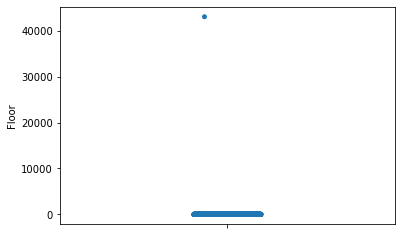

In [38]:
# La variable Floor presenta un valor atipico. Se trata de un error, el cual distorsiona las estadisticas
sns.stripplot( y = df_unified['Floor'], data=df);

In [39]:
#. Vamos a proceder a elimnarlo mediante el metodo de windsorizacion: 
print(df_unified[df_unified['Floor'] >=100] )
df_unified = df_unified.drop([959],axis=0)

          Area                    Address        Zone  Bedrooms  MetrosCuad  \
959  Chamartín  Chalet adosado en El Viso  en El Viso       5.0       310.0   

       Floor  Outer  Elevator  Penthouse  Cottage  Duplex  Semi-detached  \
959  43039.0    1.0         0          0        1       0              1   

       Rent    Rent_mean  Num schools  Num parks  Num banks  Delitos_Ponderado  
959  7500.0  2311.356808    15.598225   7.609467   20.84142           4.544795  


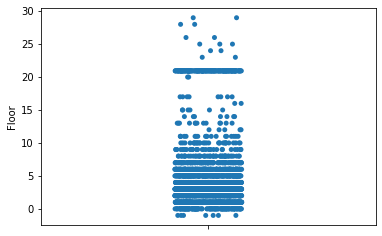

In [40]:
# ya podemos visualizar la distribuciuon correcta.
sns.stripplot( y = df_unified['Floor'], data=df);

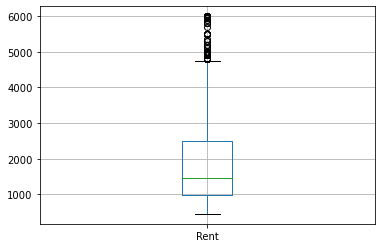

In [41]:
# La variable Rent tiene valores que superan los 6000 euros y lo que probablemente desviara la inferencia:
df_unified['Rent'].loc[df_unified['Rent'] > 6000] = 6000
df_unified[['Rent']].boxplot()

Data Transformation

In [42]:
# Utilizamos la variable address para saber el tipo de vivienda:
df_unified['Address'] = df_unified['Address'].str[:3]
# Adecuacion de typos:
df_unified['Address'] = df_unified['Address'].str.replace('Át','Ati')
df_unified['Address'] = df_unified['Address'].str.replace('DÁº','Otr')
df_unified['Address'] = df_unified['Address'].str.replace('pis','Pis')

In [43]:
df_unified['Address'].value_counts()

Pis    2141
Ati     209
Est     125
Cha      66
Dúp      63
Cas      45
Otr      11
Name: Address, dtype: int64

In [44]:
# ONE HOT ENCODING
# Mapeamos con get dummies la variable ADDRESS: (la funcion Get Dummies codifica los 
# distintos valores de una variable y elimina la cardinalidad al generar una matriz de o y 1)
# Aplicamos PCA para hacer seleeccion de las principales caracteristicas del get dummies de ADDRESS y añadimos al dataframe
address = pd.get_dummies(df_unified['Address'], drop_first=True)
pca=PCA(n_components= 3, svd_solver='full')
Pca_address= pca.fit_transform(address)
Address = pd.DataFrame(Pca_address, columns = ['Address1', 'Address2', 'Address3'])
df_unified = df_unified.join(Address).drop(columns = 'Address')


In [45]:
# Mapeamos con get dummies la variable AREA: (la funcion Get Dummies codifica los 
# distintos valores de una variable y elimina la cardinalidad al generar una matriz de o y 1)
# Aplicamos PCA para hacer seleeccion de las principales caracteristicas del get dummies de AREA y añadimos al dataframe
area = pd.get_dummies(df_unified['Area'], drop_first=True)
pca=PCA(n_components= 5, svd_solver='full')
Pca_area= pca.fit_transform(area)
Area = pd.DataFrame(Pca_area, columns = ['Area1', 'Area2', 'Area3', 'Area4', 'Area5'])
df_unified = df_unified.join(Area).drop(columns = 'Area')

In [46]:
# Mapeamos con get dummies la variable ZONE: (la funcion Get Dummies codifica los 
# distintos valores de una variable y elimina la cardinalidad al generar una matriz de o y 1)
# Aplicamos PCA para hacer selección de las principales caracteristicas del get dummies de zone y añadimos al dataframe
zone = pd.get_dummies(df_unified['Zone'], drop_first=True)
pca=PCA(n_components= 7, svd_solver='full')
Pca_zone= pca.fit_transform(zone)
Zone = pd.DataFrame(Pca_zone, columns = ['Zone1', 'Zone2', 'Zone3', 'Zone4', 'Zone5', 'Zone6', 'Zone7'])
df_unified = df_unified.join(Zone).drop(columns = 'Zone')
df_unified = df_unified.dropna()

Correlación

In [47]:
correlation_matrix = df_unified.corr().round(2)

In [48]:
mask_dum = (correlation_matrix <= -0.3) | (correlation_matrix >= 0.3) & (correlation_matrix != 1) # Mascara
corr_reduced = correlation_matrix[mask_dum] # Aplicamos mascara

In [49]:
# Correlación con la clase:
corr_reduced[['Rent']].dropna(axis=0, how= 'all').sort_values(by= 'Rent', ascending = False)

,Rent
MetrosCuad,0.80
Bedrooms,0.64
Rent_mean,0.47
Cottage,0.37


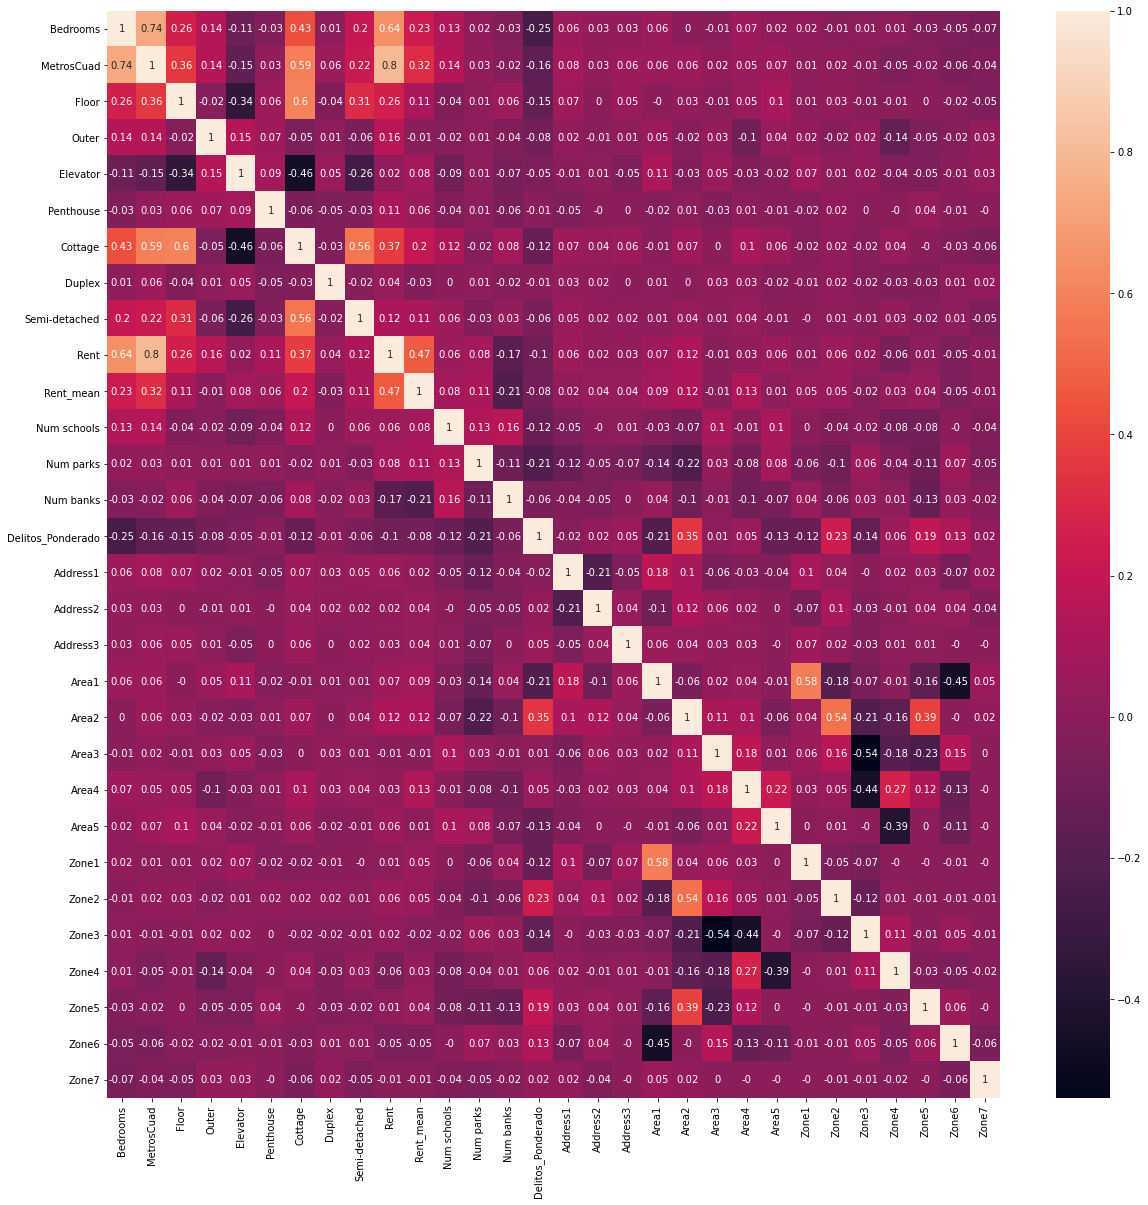

In [50]:
%matplotlib inline
plt.figure(figsize=(20, 20))
sns.heatmap(data=correlation_matrix, annot=True)

No se observan valores que a priori puedan producir problemas de colinealidad por lo que se procede a dejar el dataset entero.
Por otra parte las variables que mejor explica la renta son : 
        1) Metros Cuadrados
        2) Numero de habitaciones
        3) Renta media del barrio
        4) Y si tiene trastero

V.Entradas y V.Salida (Tarjet) SPLIT

In [51]:
Y = df_unified['Rent']

In [52]:
X = df_unified.drop(columns= ['Rent'])

In [53]:
# Train Test Split. Separamos la muestra en entrenamiento y test:
X = X
y = Y
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [54]:
y = y.astype(int)
X = X.astype(int)

Prueba de algoritmos

In [55]:
# Regresión: 
lin_model = LinearRegression(normalize = True)
lin_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [56]:
# Regresión: 
lin_model = LinearRegression(normalize = True)
lin_model.fit(X_train, y_train)

# Evaluación de Modelo:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("La performance del model para training es:")
print("--------------------------------------")
print('RMSE  {}'.format(rmse))
print('R2 score  {}'.format(r2))
print("\n")

# Model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# Root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# R-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("La performance del modelo para test es:")
print("--------------------------------------")
print('RMSE  {}'.format(rmse))
print('R2 score {}'.format(r2))

La performance del model para training es:
--------------------------------------
RMSE  639.3161276569839
R2 score  0.7591245607704582


La performance del modelo para test es:
--------------------------------------
RMSE  652.0701445302469
R2 score 0.7086963393340537


In [57]:
# Cross Folder Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_model, X_train, y_train, scoring='r2', cv=5)
scores.mean()

0.7435099568022465

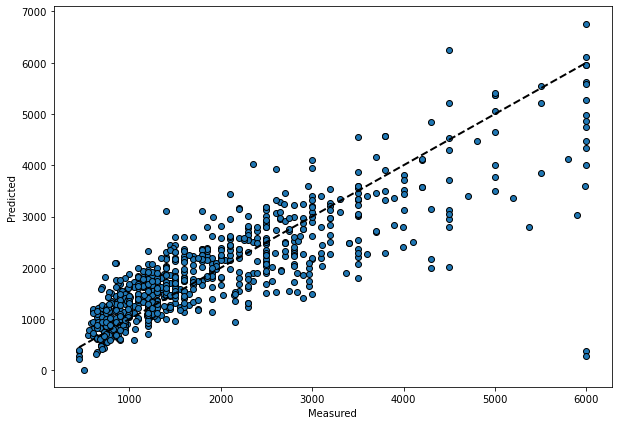

In [58]:
# Visualizacion de los errores:
plt_csp(y_test, y_test_predict)

Podemos aseverar que el modelo tiene capacidad de prediccion positiva con una variabilidad en su prediccion de +/-619 euros
y mejora la predicción sobre el modelo medio como asi indica el R2.
También observamos, gracias a la gráfica, como aproxima mejor valores de rentas bajos, siendo las rentas superiores a 6000 euros las mas complejas de aproximar.

Segun R2 el modelo mejora en un 75% a la media. El modelo es un 75% mejor que la la media. 
Para mejorar el modelo se podria añadir mas informacion externa de variables correladas con la media



In [59]:
errores = y_test-y_test_predict
X_test['Renta'] = y_test.round(0)
X_test['Predicho']=y_test_predict.round(0)
X_test['Error']= errores.round(0)

In [60]:
X_test[X_test['Error']>=1500]
# Podemos ver que parametros extraños hay en aquellas predicciones que he errado en mas de X euros para buscar
# enriquecer los datos en ese sentido. 
# Podriamos hacer un algoritmo de clasificacion para que nos agrupase por
# viviendas con carecteristicas similares para si conocer los patrones ocultos

,Bedrooms,MetrosCuad,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semi-detached,Rent_mean,...,Zone1,Zone2,Zone3,Zone4,Zone5,Zone6,Zone7,Renta,Predicho,Error
687,2.0,90.00,4.000000,1.0,1,1,0,0,0,3689.000000,...,-0.033294,-0.045554,-0.036217,-0.020087,-9.514189e-16,-0.026664,7.631023e-16,3995.0,2415.0,1580.0
2127,4.0,230.00,2.000000,1.0,1,0,0,0,0,1973.000000,...,-0.040190,-0.056991,-0.048444,-0.029024,-1.142470e-15,-0.041035,3.603744e-16,4500.0,2947.0,1553.0
955,2.0,90.00,0.000000,1.0,1,0,0,0,0,3392.000000,...,-0.329973,0.883145,0.112305,0.032742,1.562839e-15,0.031928,1.300846e-17,4300.0,2181.0,2119.0
954,2.0,90.00,0.000000,1.0,1,0,0,0,0,3392.000000,...,-0.029633,-0.039802,-0.030648,-0.016442,-1.166512e-15,-0.021295,-9.217167e-17,4300.0,1996.0,2304.0
382,2.0,220.00,3.000000,1.0,1,0,0,0,0,2065.000000,...,-0.113602,-0.263035,0.909505,0.074777,3.372868e-15,0.060205,1.567680e-17,4500.0,2787.0,1713.0
328,4.0,300.00,10.000000,1.0,1,1,0,0,0,2161.000000,...,-0.034234,-0.047065,-0.037741,-0.021128,-1.709284e-15,-0.028247,2.097572e-15,6000.0,4008.0,1992.0
921,7.0,1.23,20.937601,1.0,0,0,1,0,0,2570.750000,...,-0.029999,-0.040369,-0.031181,-0.016780,-1.153555e-15,-0.021782,-1.823535e-16,6000.0,386.0,5614.0
353,3.0,160.00,6.000000,1.0,1,0,0,0,0,2065.000000,...,-0.047233,-0.069566,-0.063999,-0.042704,-2.332376e-15,-0.067058,1.625328e-15,3800.0,2283.0,1517.0
570,4.0,415.00,0.000000,1.0,0,0,0,0,0,2311.356808,...,-0.030760,-0.041551,-0.032304,-0.017500,-1.004780e-15,-0.022827,1.037765e-16,6000.0,4335.0,1665.0
1665,4.0,280.00,17.000000,1.0,1,1,0,0,0,1766.000000,...,-0.039215,-0.055324,-0.046558,-0.027553,-2.246369e-15,-0.038543,2.431923e-16,5990.0,3591.0,2399.0
